<a href="https://colab.research.google.com/github/AppleTater/Jinkerson-Lab-Research/blob/master/1.%20Multi_Level%20%2B%20Histograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Files that need to be uploaded**


---
* large-lib_full_2016.10.25.csv
* TAGData.csv


# Library


In [ ]:
%reload_ext rpy2.ipython

# %%R
# library(ggplot2)

import rpy2.robjects as robjects                          # common rpy2 objects under the abbreviation 'robjects'
from rpy2.robjects.packages import importr                # rpy2 packages under the abbreviation 'importr'
from rpy2.robjects.vectors import FloatVector             # rpy2 for float conversion
import gc                                                 # rpy2 library
R_stats = importr('stats',  robject_translations={'format_perc': '_format_perc'})                                
# rpy2 stats

from io import StringIO

from rpy2.rinterface_lib.sexp import StrSexpVector        # rpy2 interface
from functools import partial                             # rpy2 tools under the abbreviation 'partial'
from rpy2.ipython import html                             # html support
html.html_rdataframe=partial(html.html_rdataframe, table_class="docutils")

from rpy2.robjects.conversion import localconverter       # rpy2 converter under the abbreviation 'localconverter'  

import pandas as pd                                       # these libraries are for redundancy
import rpy2.robjects as ro                                # ↓
from rpy2.robjects.packages import importr                # ↓
from rpy2.robjects import pandas2ri                       # ↓


In [ ]:
import pandas as pd                                       # importing common pandas libraries under the abbreviation 'pd' 
import matplotlib.pyplot as plt                           # was for the requested histogram under the abbreviation 'plt' 

import numpy.matlib                                       # to calculate mean and median
import numpy as np                                        # numpy under the abbreviation 'np' 
from numpy import median                                  # from the numpy library, import how to get the median

import scipy.stats as stats                               # libraries used for BH adjustment under the abbreviation 'stats' 
import scipy.special                                      # special libraries from scipy

import re                                                 # more libraries
import sys                                                # more libraries

from IPython.display import (                             # display data, if wanted, as different media file types
    display_pretty, display_html, display_jpeg,
    display_png, display_json, display_latex, display_svg
)

from IPython.display import display                       # more display tools
import itertools                                          # more display tools
import gc                                                 # more display tools

import statsmodels.api as sm                              # stats models under the abbreviation 'sm'
import statsmodels.stats.multitest as smm                 # stats models under the abbreviation 'smm'
import statsmodels.formula.api as smf                     # stats models under the abbreviation 'smf'

import random

# Histograms

In [ ]:


# CHANGE COMPARISONS                                                            # left_histogram_comparison / right_histogram_comparison
left_histogram_comparison = str(input("Left comparison: "))                     
right_histogram_comparison = str(input("Right comparison: "))               
print("\n" + left_histogram_comparison + " vs. " + right_histogram_comparison + "\n")


# CHANGE RANGE FOR HISTOGRAM
more_histogram = float(input("Histogram data will be more than: "))             # more_histogram < histogram data
less_histogram = float(input("Histogram data will be less than: "))             # less_histogram > histogram data
print("\nHistogram data: " + str(more_histogram) + " < x < " + str(less_histogram)+ "\n")

# BINS
number_of_bins = int(input("Bins: "))                                           # number of histogram bins

# RANDOM COLORS                                                                 # random color generator for cooler histogram colors
r = random.random()
b = random.random()
g = random.random()
color = (r, g, b)


Left comparison: R6-S#22-HLG_WHOLE-C_normalized_reads
Right comparison: R6-S#22-ALL_WHOLE-C_normalized_reads

R6-S#22-HLG_WHOLE-C_normalized_reads vs. R6-S#22-ALL_WHOLE-C_normalized_reads

Histogram data will be more than: 0
Histogram data will be less than: 20

Histogram data: 0.0 < x < 20.0

Bins: 20


AxesSubplot(0.125,0.125;0.775x0.755)


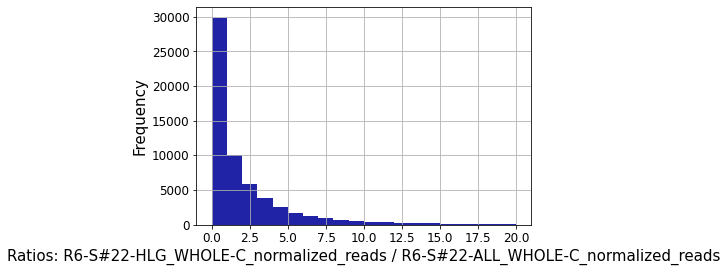

In [ ]:
data = pd.read_csv('TAG Data.csv')                                              # read TAG Data

data = data[['gene', left_histogram_comparison, right_histogram_comparison]]    # store only gene names, and the user inputted columns
data_ratios = "Ratios: " + str(left_histogram_comparison) + " / " + str(right_histogram_comparison)
# string, data_ratios store "Ratios: left_histogram_comparison / right_histogram_comparison"

data[data_ratios] = data[left_histogram_comparison] / data[right_histogram_comparison]
# new column in data, named data_ratio's string, store data's left_histogram_comparison divided by data's right_histogram_comparison

filter_more = data[data_ratios] > more_histogram                                # filter with restriction on data's data_ratio column that all values must be greater than user inputted value
filter_less = data[data_ratios] < less_histogram                                # filter with restriction on data's data_ratio column that all values must be less than user inputted value
data.where(filter_more & filter_less, inplace = True)                           # apply the filters
data = data.dropna()                                                            # drop 'NaN', ungraphable(?)

histogram = data[data_ratios].hist(bins = number_of_bins, color = color, grid = True, xlabelsize = 12, ylabelsize = 12)
#generate histogram, with user inputted number of bins and randomized color
plt.xlabel(data_ratios, fontsize = 15)                                          # x-axis has label of data_ratio
plt.ylabel ("Frequency", fontsize = 15)                                         # y-axis has label of "Frequency"

print(histogram)

# Multi-Level


In [ ]:
# CHANGE LISTS
bin_confidence = [3,4]
bin_count = [3,4,5]

# CHANGE COMPARISONS
left_comparison = "R5-S#18-HLG_WHOLE-A_normalized_reads"                              # numerator
right_comparison = "R5-S#18-ALL_WHOLE-A_normalized_reads"                       # denominator

# EMPTY DICTIONARIES AND LISTS
range_dict = {}                                                                 # empty dictionary to hold variable number of ranges for the variable number of bins
bin_range_list = []                                                             # empty list to hold the range, to create a list of the bin ranges
multi_level = pd.DataFrame()                                                    # empty dataframe to hold the hierarchical column headers

In [ ]:
import numpy as np
import rpy2.robjects.numpy2ri
from rpy2.robjects.packages import importr
rpy2.robjects.numpy2ri.activate()

stats = importr('stats')

tag = pd.read_csv('TAG Data.csv')                                               # read in 'TAG Data.csv'
lib = pd.read_csv('large-lib_full_2016.10.25.csv')                              # read in 'large-lib_full_2016.10.25.csv' 

print("\n")
number_of_bins = int(input("Number of bins: "))                                 # user input for number of bins

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# ↓ Benjamini-Hochberg Adjustment of p-values ↓
# calls on a statisical adjustment from an R library:
def FDR_adjust_pvalues(case, N=None, method='BH'):
    """ Adjust a list of p-values for false discovery rate using R's stats::p.adjust function.

    N and method are passed to R_stats.p_adjust:
    - N is the number of comparisons (if left unspecified, defaults to len(pvalue_list), I think)
    - method is the name of the adjustment method to use (inherited from R)

    Note that this MUST be done after all the p-values are already collected, on the full list of p-values at once:
    trying to do it on single p-values, even with adjusted N, will give different results!
    """
    if not method in R_stats.p_adjust_methods:
        raise ValueError("Unknown method %s - method must be one of (%s)!"%(method, ', '.join(R_stats.p_adjust_methods)))
    if N is None:   return R_stats.p_adjust(FloatVector(case), method=method)
    else:           return R_stats.p_adjust(FloatVector(case), method=method, n=N)

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# for 'TAG Data.csv'
tag_df = tag [['gene', 'IB', left_comparison , right_comparison]]
# keep only the listed columns
tag_df = tag_df.loc[~((tag_df['gene'] == "unknown_chrom") | (tag_df['gene'] == "gene_unknown")),:]
# drop rows that have 'unknown_chrom' or 'gene_unknown' as gene values
tag_df = tag_df[~tag_df.gene.str.contains (" & ")]                              # drop rows that have an ampersand (sometimes the gene names are 2, joined by an ampersand)
tag_df.reset_index(drop = True)                                                 # reset index

# for 'large-lib_full_2016.10.25.csv'
lib_df = lib[['gene', 'IB', 'confidence_level' ]]
# keep only the listed columns
lib_df = lib_df.loc[~((lib_df['gene'] == "unknown_chrom") | (lib_df['gene'] == "gene_unknown")),:]
# drop rows that have 'unknown_chrom' or 'gene_unknown' as gene values
lib_df = lib_df[~lib_df.gene.str.contains (" & ")]                              # drop rows that have an ampersand (sometimes the gene names are 2, joined by an ampersand)
lib_df = lib_df.reset_index(drop = True)                                        # reset index

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

merged = tag_df.merge(lib_df, on = "IB")                                        # merge tag_df to lib_df based on their IB
merged ['Ratios: HLG / ALL (Whole)'] = merged [left_comparison] / merged[right_comparison]
# calculate HLG / ALL for ratio      
merged = merged.replace([np.inf, -np.inf], 9999.999999)
merged = merged.drop(columns = {'gene_y', left_comparison, right_comparison})
# drop listed columns
merged["Bin Type"] = ""                                                         # empty column in merged, "Bin Type"

print("\n")
for i in range(number_of_bins):                                                 # beginning of for loop, for every i in the number of bins...
  increased_i = i + 1                                                           # at every instance of i, increased_i is i + 1
  print("Bin Number", i + 1,":")                                                # print the bin number

  if (i == number_of_bins - 1):                                                 # if i = number_of_bins - 1 (signifies the last bin)
    bin_min = float(input("\tMinimum: "))                                       # user input for the minimum (assuming that the range is x > input)
    print("x >" , bin_min)                                                      # print "x > input"
    bin_range = ("x > " + str(bin_min))                                         # convert bin_min from float to a string, store "x > bin_min" in bin_range
    range_dict['bin_range_' + str(increased_i)] = bin_range                     # variable variable, 'bin_range_'i'' = bin_range
    locals().update(range_dict)                                                 # store value in range dictionary
    bin_range_list.append(bin_min)                                              # store the minimum value
    break                                                                       
    # end of for loop

  if (i == 0):                                                                  # if i = 0, indicates first bin
    bin_min = float(input("\tMinimum: "))                                       # user input for minimum
    bin_max = float(input("\tMaximum: "))                                       # user input for maximum
    print(bin_min , "≤ x ≤" , bin_max)                                          # print "bin_min ≤ x ≤ bin_max"
    bin_range = (str(bin_min) + " ≤ x ≤ " + str(bin_max))                       # convert bin_min and bin_max from float to string, store "bin_min , "≤ x ≤" , bin_max" in bin_range
    bin_range_list.append(bin_min)                                              # store the minimum value
    #bin_range_list.append(bin_max)

  else:                                                                         # else (if not the first or last bins)
    bin_min = float(input("\tMinimum: "))                                       # user input for minimum
    bin_max = float(input("\tMaximum: "))                                       # user input for maxmim

    print(bin_min , "< x ≤" , bin_max)                                          # print "bin_min < x ≤ bin_max"
    bin_range = (str(bin_min) + " < x ≤ " + str(bin_max))                       # convert bin_min and bin_max from float to string, store "bin_min , "< x ≤" , bin_max" in bin_range
    bin_range_list.append(bin_min)                                              # store the minimum value
    #bin_range_list.append(bin_max)
  range_dict['bin_range_' + str(increased_i)] = bin_range                       # variable variable, 'bin_range_'i'' = bin_range
  locals().update(range_dict)                                                   # store bin_range_'i' in range dictionary
  # end of for loop    

print('\n')
for key, value in range_dict.items():                                           # for values in range dictionary
  print(key, " : " , value)                                                     # print print "key, " : " , value"

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

string_ranges = str(range_dict.values())                                        # convert range dictionary values to strings, store in string_ranges
list_ranges = re.findall("\d+\.\d+", string_ranges)                             # find instances of decimals 

range_frame = pd.DataFrame(list_ranges, columns = ["Value"])                    # create dataframe from list_ranges, range_frame
range_frame_even = range_frame[range_frame.index % 2 == 0].reset_index(drop = True)
# range_frame_even = where range_frame's index is not odd (implies minimum value of the range)
range_frame_odd = range_frame[range_frame.index % 2 == 1].reset_index(drop = True)
# range_frame_odd = where range_frame's index is odd (implies maximum value of the range), for last bin, where there is no maximum, stores "NaN"

range_frame = pd.concat([range_frame_even, range_frame_odd], axis = 1)          # concatenate range_frame_even and range_frame_odd side by side
range_frame.columns = ['Min', 'Max']                                            # rename columns to "Min" and "Max"
range_frame = range_frame.replace(np.nan, np.inf)                               # replace "NaN", by "inf" (infinity)

range_frame['Min'] = range_frame['Min'].astype(float)                           # convert column values back to floats
range_frame['Max'] = range_frame['Max'].astype(float)                           # convert column values back to floats

def conditions(merged):                                                         # define function, "conditions" to be run on merged
  for i in range(number_of_bins):                                               # beginning of for loop, for every i in the number of bins...                                               
    if ((range_frame.iloc[i, 0] <= merged["Ratios: HLG / ALL (Whole)"]) & (merged["Ratios: HLG / ALL (Whole)"] <= range_frame.iloc[i, 1])):
    # if merged["Ratios: HLG / ALL (Whole)"] is >= value in range_frame.iloc[i,0] (the minimum) & merged["Ratios: HLG / ALL (Whole)"] is <= range_frame.iloc[i, 1] (the maxmimum)
      return i + 1                                                              # return i + 1 (if i = 1, return 2)
    if ((range_frame.iloc[i, 0] <= merged["Ratios: HLG / ALL (Whole)"]) & (range_frame.iloc[i,1] == np.inf)):
    # if merged["Ratios: HLG / ALL (Whole)"] is >= value in range_frame.iloc[i,0] (the minimum) & range_frame.iloc[i, 1] == inf (infinity), remember one instance of no maxmimum
      return number_of_bins + 1                                                 # return number_of_bins + 1

merged["Bin Type"] = merged.apply(conditions, axis = 1)                         # on merged["Bin Type"], apply conditions
merged = merged.rename(columns = {'gene_x' : 'Gene', 'confidence_level' : "Confidence Level"}).reset_index(drop = True)

gene_only_arr = merged["Gene"].unique()
gene_only_df = pd.DataFrame()
gene_only_df["Gene"] = pd.Series(gene_only_arr)
gene_only_df = gene_only_df.sort_values(by = ["Gene"]).reset_index(drop = True)

merged = merged.sort_values('Gene').replace([np.inf, -np.inf], np.nan).dropna()
merged["Bin Type"] = merged["Bin Type"].astype(int)


for count in bin_count:
  for confidence in bin_confidence:
    # rename columns
    new_merged = merged[merged["Confidence Level"] <= confidence]
    # sort the values by the gene name, replace inf by Nan, drop rows that has Nan, reset the index
    new_merged = new_merged.reset_index(drop = True)

    merged_count_drop = pd.DataFrame(data = new_merged['Gene'], columns = ['Gene'])     # new dataframe, merged_count_drop, gets unique genes
    merged_count_drop = new_merged['Gene'].value_counts().to_frame().reset_index().rename(columns = {'index' : 'Gene', 'Gene' : 'Count'})
    # count the number of instances of each gene, stored in a new column, 'Count'
    merged_count_drop = merged_count_drop[merged_count_drop['Count'] >= count].reset_index(drop = True)
    # drop rows that has a count that is less than the inputted count restriction
    merged_count_drop  = merged_count_drop.dropna().sort_values('Gene').reset_index(drop = True)
    # drop rows that have Nan, sort dataframe by gene name, reset index

    clean = new_merged.merge(merged_count_drop, on = "Gene")                            # merge merged and merged_count_drop based on gene name

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

    unique_gene = pd.DataFrame(clean['Gene'].unique())                              # dataframe to store the unique gene names
    bin_type = clean[['Gene', "Bin Type"]]                                          # dataframe to store all genes + mutants + bin type

    super_bins = []                                                                 # declare empty list
    xl_p_val = []                                                                   # declare empty list

    for i in range(len(unique_gene)):                                               # for i in the range of the number of rows in unique_genes
      same_gene = bin_type.loc[bin_type.Gene == unique_gene.iloc[i,0]]              # find where the unique gene name dataframe at i equals the bin_type dataframe with all the mutants
      bin_df = pd.DataFrame(same_gene["Bin Type"].value_counts()).reindex(index = range(1,number_of_bins + 1)).transpose().fillna(0).astype(int)
      # splice by gene names, count occurrence of every bin number, make columns from 1 - ... for the bin numbers, replace 'NaN' with 0, change from float to integer, switch x and y axis

      bin_df = bin_df.set_index(same_gene['Gene'].unique())                         # make the unique gene names the index

      super_bins.append(bin_df)                                                     # append data to each other, avoid long run times
      # looks like: [Total in: 1 , Total in: 2 , Total in: 3 , Total in: 4 , etc.]
    # end of for loop

    super_bins = pd.concat(super_bins, axis = 0)                                    # concatenate the lists into a dataframe
    super_bins = super_bins.transpose()                                             # switch x and y axis again
    super_bins["Total"] = super_bins.sum(axis = 1)                                  # add up total count in each bin to create the 'Total' 
    super_bins = super_bins.transpose()                                             # switch x and y axis again

    total = super_bins.loc[super_bins.index == 'Total']                             # make total dataframe, and the index name to be 'Total'

    for i in range(len(unique_gene)):                                               # for i in the range of the number of rows in unique_genes
      same_gene = super_bins.loc[super_bins.index == unique_gene.iloc[i,0]]         # find where the unique gene name dataframe at i equals the bin_type dataframe with all the mutants
      
      bin_frames = [same_gene, total]                                               # create a contingency table, 'frame' with the the individual gene bin table and the total
      bin_concat = pd.concat(bin_frames)                                            # concatenate bin_frames ↑
      m = np.array(bin_concat)                                                      # change from dataframe to an array  
      res = stats.fisher_test(m, workspace = 2e+06)                                 # do the r fisher test, and expand workspace since the default, 2+e05 was too small         
      val = format(res[0][0])                                                       # re-format the results

      xl_p_val.append(val)                                                          # append the results to empty list
    # end of for loop

    xl_p_val = pd.DataFrame(xl_p_val, columns = ['p-value'])                        # convert list to dataframe with the column, 'p-value'
    xl_p_val = pd.concat([unique_gene, xl_p_val], axis = 1).rename(columns = {0 : 'Gene'}).set_index('Gene')
    # concatenate the the unique gene names to the p-values, side by side, rename the column, set the index of the dataframe to be the gene name

    super_bins = super_bins.reset_index().rename(columns = {'index' : 'Gene'})      # reset the index of super_bins and rename column
    new_super_bins = gene_only_df.merge(super_bins, how='left', on = "Gene")
    
    xl_p_val = xl_p_val.reset_index()                                               # reset index of xl_p_val
    xl_p_val["Adjusted p-value"] = FDR_adjust_pvalues(xl_p_val["p-value"])
    
    bin_and_p_val = pd.merge(new_super_bins, xl_p_val, how ='left', on = 'Gene').set_index('Gene').fillna(0)
    bin_and_p_val_names = bin_and_p_val.columns.values.tolist()
    del bin_and_p_val_names[-1]
    del bin_and_p_val_names[-1]
    bin_and_p_val[bin_and_p_val_names] = bin_and_p_val[bin_and_p_val_names].astype(int)
    
    # adjust bin_and_p_val["Adjusted p-value"]
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

    bin_and_p_val['Bins'] = bin_and_p_val[bin_and_p_val.columns[0 : number_of_bins]].apply(lambda x: ", ".join(x.dropna().astype(str)), axis=1)
    # combines the counts of the mutants inside each bin into one cell, separateed by commas, column name: 'Bins'
    bin_and_p_val = bin_and_p_val[["Bins", "p-value", "Adjusted p-value"]]      # reorder dataframe
    bin_and_p_val = bin_and_p_val.replace({'Bins' : {"0, 0, 0, 0" : np.nan},
                                           'p-value' : {0: np.nan},
                                           "Adjusted p-value" : {0 : np.nan}})

    total["Bins"]= total[total.columns[0 : number_of_bins]].apply(lambda x: ", ".join(x.dropna().astype(str)), axis=1)
    total = total[["Bins"]].iloc[[0]]

    frames = [total, bin_and_p_val]
    bin_and_p_val = pd.concat(frames)
    
    count_df = pd.DataFrame(data = {count}, columns = {"Read Count"}).transpose()
    # swtich the x and y axes for the count

    confidence_df = pd.DataFrame(data = {confidence}, columns = {"Confidence Level"}).transpose()
    # swtich the x and y axes for the confidence level

    bin_range_df =  pd.DataFrame(bin_range_list, columns = {"Bin Range"}).transpose()
    # swtich the x and y axes for the bin range
    bin_range_df["Bin Range"] = bin_range_df[bin_range_df.columns[0 : number_of_bins]].apply(lambda x: ", ".join(x.dropna().astype(str)), axis=1)
    # combines the different range values into one cell
    bin_range_df = bin_range_df[["Bin Range"]].rename(columns = {"Bin Range": 0})
    # rename new column to "Bin Range"

    tuples = [("Read Count", count_df.iloc[0,0], "Bin Counts"), ("Confidence Level", confidence_df.iloc[0,0], "p-value"), ("Bin Range", bin_range_df.iloc[0,0], "Adjusted p-value")]
    # tuples = only the count number, confidence level, and the bin range
    bin_and_p_val.columns = pd.MultiIndex.from_tuples(tuples)                   # use MultiIndex to have layered column headers

    multi_level = pd.concat([multi_level, bin_and_p_val], axis = 1)             # in the multi_level dataframe, concatenate itself and bin_and_p_val

# use date and time to ensure uniqueness of csv file names
now = pd.DataFrame(dict(timestamp = pd.to_datetime(["now"]))).to_string()       # since using the timestamp has its own data type, convert to a string to generate unique csv names when downloaded
now = now + ".csv"                                                              # append ".csv" to the time
now = now.replace("                   timestamp\n0 ", "", 1)                    # remove excess whitespace and the label

multi_level.to_csv(now)                                                         # download multi_level as a csv with the timestamp as its name

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)






Bin Number 1 :
0.0 ≤ x ≤ 3.0
Bin Number 2 :
3.0 < x ≤ 5.0
Bin Number 3 :
x > 5.0


bin_range_1  :  0.0 ≤ x ≤ 3.0
bin_range_2  :  3.0 < x ≤ 5.0
bin_range_3  :  x > 5.0


In [ ]:
range_frame

,Min,Max
0,0.0,0.2
1,0.2,3.9
2,3.9,inf
